#**Analysis of the Influences on Student Performance in School**
**Fall 2024 Data Science Project**

Shoubhit Babu, Cindy Wang, Azariyas Tafesse, Renato Chavez Lovon, Abhishek Poudel

**Contributions:**
* Shoubhit Babu
   - Project Idea: I helped brainstorm and idea with my group memebers. I suggested looking at dat sets online and gave some examples of data sets we could use from kaggle.
   - Data Exploration and Summary Statistics: I created the guding quesions for our data explorations and also ran the ANOVA hypothesis test as well as the post hoc anlysis. Also I Created the visualization for the distribution of exam scores to confirm it was a normal distribution.
   - ML Algorithm Training and Test Data Analysis: I trained the linear regression model to have it have an accuracy of 0.67 and graphed the predicted exam scores vs. the actual aexam score. I tried to things such as a PCA and using different regression models to increase the accuracy, but the accuracy ended up being the same, so I did not include those things in the notebook.
   - Final Tutorial Report Creation: I reformated the notebook so it would follow the format specified in the rubric and added commentary in each section to make it feel like a tutorial. I also added some links for readers who would like to know more about a certain topic.
* Cindy Wang
   - Project Idea
   - Data Exploration: I created the boxplots to show the distributions of each variable. I also determined if the Final Exam scores were normally distributed, and explored the question of whether or not teacher quality and family income were related.
   - ML Algorithm Design/Development: I helped determine which rows were unnecessary and needed to be removed. I also converted categorical data into numerical data so that the ML algorithms could run properly by correctly converting nominal and ordinal data separately.
   - ML Algorithm Training and Test Data Analysis: I worked on the Logistic Regression Model. I implemented the Confusion Matrix to show the True Positives, True Negatives, False Positives, and False Negatives.
   - Visualization, Result Analysis, Conclusion: I wrote the conclusion paragraph for our analysis. I also contributed to tweaking some of the analysis for the visualization section.
* Azariyas Tafesse
   - Project Idea
   - Dataset Curation and Preprocessing: After downloading the excel file I transformed it into a df.I changed names of the columns to make it more descriptive of the data. Filled in the null data by imputation and did bound checks of the data, removed values over 100 oor less than 0.
   - ML Algorithm Design/Development : Before training the model, I removed unnecessary rows from the df. I set the model to predict if a student would get a C- (70%) or greater on ther final. Data was split 80/20 using Linear regression as the model since it was the most accurate (~94%). I also listed the columns (top 5) that has the biggest influence on the model.
   - ML Algorithm Training and Test Data Analysis
  
* Renato Chavez Lovon
   - Project Idea
   - Data Exploration and Summary Statistics: After the data was cleaned and nicely formatted, I attempted to find significant patterns and relations between our variables by applying two-tailed t test, Pearson Correlation Matrix, and ANOVA test accordingly.
   - Primary analysis: Presented a hypothesis of what factors may have more influence than others in student performance, proceeded with adequate testing in order to validate or deny the hypothesis and reach other important conclusions.
   - Visualization, Result Analysis, Conclusion: After applying hypothesis testing methods, I created visualizations in the forms of plots, matrices, etc. to be able to identify the results more easily. Then, I interpreted the results along with the visualizations in order to come up with meaningful conclusions that explain the results of the exploration and testing.
* Abhishek Poudel
   - Project Idea
   - ML Algorithm Design/Development:
      I developed a Random Forest Regressor to predict student exam scores, incorporating hyperparameter tuning with RandomizedSearchCV for optimal performance. The model was designed to analyze both academic and non-academic factors, including attendance, hours studied, and peer influence.
   - ML Algorithm Training, Visualization, and Test Data Analysis: I trained the model on 80% of the dataset and evaluated it on the test data, achieving an RMSE of 2.21 and an 𝑅^2 score of 0.66. I visualized the results with a scatter plot of predicted vs. actual scores and a feature importance chart, which identified attendance and hours studied as the strongest predictors, with peer influence having a minor impact."




#**Introduction**

Student performance is influenced by a wide range of factors beyond just the number of hours spent studying. For students juggling multiple responsibilities, such as work-study commitments, understanding these influences is crucial. Our project aims to explore the various determinants of academic success, such as hours studied, sleep patterns, family income, peer influence, and teacher ratings. By analyzing these factors in a dataset, we will hypothesize about their impact on student performance and develop predictive models to forecast outcomes. Through this investigation, we seek to identify the key drivers of academic performance, quantify their importance, and uncover actionable insights to help students enhance their results effectively. In the end  we would like to understand the level of
importance of certain factors related to our performance and answer the following question:
What factors should students focus on to improve their performance in classes?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Curation**
In this section we will explain how our data was collected and process our data so it is ready for analysis and exploratiion. The data we will be using is from a kaggle data set, which can be downloaded [here](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data). This data set contains the grades for a final exam of students as well as information about their lifestyle and education such as the quality of their teacher, amount of peer influence, etc.

Libraries imported for this project:

In [ ]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import tukey_hsd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
import statsmodels.api as sm
import matplotlib
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import ast
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To suppress some warnings
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

Here we are converitng the downladed student perofrmance CSV file into a dataframe


In [ ]:
student_df = pd.read_csv('StudentPerformanceFactors.csv')
student_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Get info about the data

In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

##Data Cleaning
Now that we have our data it is time to do some data cleaning. Data cleaning is a crucial step in the data science lifecycle because it ensures the dataset is accurate, consistent, and suitable for analysis. Raw data often contains errors such as missing values, duplicates, or inconsistencies that can lead to misleading results or inaccurate predictions if not addressed. Cleaning the data involves handling missing values, fixing inconsistencies, removing duplicates, and addressing outliers, all of which improve the quality and reliability of the dataset. It ensures proper data types are assigned to each column, making the data ready for analysis and modeling. Cleaned data is essential for preparing machine learning models, as it meets the specific requirements for encoding categorical variables, scaling features, and eliminating invalid entries. By providing a clearer representation of the data, cleaning facilitates better insights, improves model accuracy, and saves time in later stages of the project.


First we will change some of the columns names are not helpfull in describing what the data is. We will ename columns to reflect how the website describes each column.

Change Columns....<br>
Hours_Studied $\Rightarrow$ weeklyHrs_studied <br>
Attendance $\Rightarrow$ Attendance_% <br>
Sleep_Hours $\Rightarrow$ SleepHrs_per_Night <br>
Tutoring_Sessions $\Rightarrow$ Monthly_Tutoring_Sessions <br>
Physical_activity $\Rightarrow$ Weekly_Exercies_hrs


In [ ]:
student_df = student_df.rename(columns={'Hours_Studied': 'weeklyHrs_Studied'})
student_df = student_df.rename(columns={'Attendance': 'Attendance_%'})
student_df = student_df.rename(columns={'Sleep_Hours': 'Sleephr_per_Night'})
student_df = student_df.rename(columns={'Tutoring_Sessions': 'Monthly_Tutoring_Session'})
student_df = student_df.rename(columns={'Physical_Activity': 'Weekly_Exercise_hrs'})
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   weeklyHrs_Studied           6607 non-null   int64 
 1   Attendance_%                6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleephr_per_Night           6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Monthly_Tutoring_Session    6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Now we will check if any collumns have missing data

In [ ]:
student_df.isnull().sum() / len(student_df) * 100


,0
weeklyHrs_Studied,0.000000
Attendance_%,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleephr_per_Night,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Monthly_Tutoring_Session,0.000000


We can see above that the 3 columns that have missing data are Distance_from_home,Parental_Education_Level, and Teacher_Quality. We will handle the missing in different ways depending on if it is missing at random, missing not at random, or missing completely at random. If you want to know more about this, look at [this](https://stefvanbuuren.name/fimd/sec-MCAR.html).

 Distance_from_Home could be considered Missing completly at random. The distance a student lives wouldn't be something that affects reporting. If they live far and report it, they may get assistance or prefer online classes.
Teacher Quality could be considered missing at random. A student with a low attedance rate may not give an answer becuase they don't realy no the teacher well enough to rate them.
Parental_Education_Level would be considered as Missing **NOT** at random. Students may not want to enter there familes income level becuase they may be embarrased they live in poverty or are ultra-rich.



###**Impute Null Values**

Null values in datasets can disrupt analyses and machine learning models, leading to inaccurate results. To handle them, we can remove rows or columns with minimal missing data, impute values using methods like mean, median, or mode, or use advanced techniques like KNN or regression imputation. The chosen method depends on the extent of missing data, its distribution, and the impact on the analysis, ensuring the dataset is robust and reliable. In our tutorial we will use simple methods of imputation, but if you would like to know how use advanced techiniques such as KNN for imputation, you can look at this:
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

In the code below, we are replacing all the null values of studentdf by imputation. We will look at similar rows and fill in the missing values.

In [ ]:
#sepeate colums by numbers and objects data types
num_cols = student_df.select_dtypes(include=['number']).columns
categorical_cols = student_df.select_dtypes(include=['object']).columns
print(num_cols)
print(categorical_cols)

Index(['weeklyHrs_Studied', 'Attendance_%', 'Sleephr_per_Night',
       'Previous_Scores', 'Monthly_Tutoring_Session', 'Weekly_Exercise_hrs',
       'Exam_Score'],
      dtype='object')
Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')


Now we will perform imputatuin by using mode since missing data is only about 1 percent.

In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
student_df[categorical_cols] = cat_imputer.fit_transform(student_df[categorical_cols])

Validate Null values have been filled.

In [ ]:
student_df.isnull().sum()

,0
weeklyHrs_Studied,0
Attendance_%,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleephr_per_Night,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Monthly_Tutoring_Session,0


### **Bounds Checking**
Now we will check if the exam scores, previous exam scores, and attendace % does not go above 100 or bellow 0. A valid value should only include 0 through 100 inclusive. If values are out of bounds, we will remove that row.

In [ ]:
student_df = student_df[
    (student_df['Exam_Score'] <= 100) & (student_df['Exam_Score'] >= 0) &
    (student_df['Previous_Scores'] <= 100) & (student_df['Previous_Scores'] >= 0) &
    (student_df['Attendance_%'] <= 100) & (student_df['Attendance_%'] >= 0)
]

student_df [student_df['Exam_Score'] > 100]

,weeklyHrs_Studied,Attendance_%,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleephr_per_Night,Previous_Scores,Motivation_Level,Internet_Access,Monthly_Tutoring_Session,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Weekly_Exercise_hrs,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [ ]:
student_df = student_df[(student_df['Exam_Score'] <= 100) & (student_df['Exam_Score'] >= 0)]
student_df

,weeklyHrs_Studied,Attendance_%,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleephr_per_Night,Previous_Scores,Motivation_Level,Internet_Access,Monthly_Tutoring_Session,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Weekly_Exercise_hrs,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
student_df = student_df.sort_values(by='Exam_Score', ascending=False)
student_df

,weeklyHrs_Studied,Attendance_%,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleephr_per_Night,Previous_Scores,Motivation_Level,Internet_Access,Monthly_Tutoring_Session,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Weekly_Exercise_hrs,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
6347,28,96,High,Low,Yes,4,98,High,Yes,1,High,High,Public,Positive,3,No,High School,Near,Male,98
4192,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,Medium,Medium,Public,Positive,2,No,College,Moderate,Female,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,9,64,Medium,Low,Yes,10,68,Low,Yes,0,Medium,Medium,Private,Negative,3,No,High School,Near,Male,57
5907,3,60,Medium,Low,Yes,6,78,Low,Yes,1,Low,Medium,Public,Positive,1,No,Postgraduate,Near,Female,57
3543,14,67,Low,Low,Yes,7,66,Low,Yes,0,Low,Medium,Public,Neutral,4,No,High School,Far,Female,57
5507,5,65,Low,High,No,7,71,Medium,Yes,0,Low,Medium,Private,Negative,2,No,College,Far,Male,56


# **Data Exploration**
This section of our tutorial will focus on exploratory data analysis (EDA), a critical step in understanding the structure, patterns, and relationships within the dataset. EDA involves summarizing data through descriptive statistics, visualizing distributions, and identifying trends, correlations, or anomalies that can inform subsequent analysis or modeling. By leveraging tools like histograms, scatter plots, box plots, and heatmaps, we can uncover insights, assess data quality, and generate hypotheses, setting the foundation for effective data-driven decision-making.

Additionally, we will incorporate hypothesis testing as part of our EDA process to statistically validate assumptions and relationships observed in the data. For example, we may test whether certain factors, such as teacher quality or attendance, have a significant impact on exam scores. If you want learn more about the purpose of hypothesis testing and how to do it look here: https://www.geeksforgeeks.org/understanding-hypothesis-testing/

We will be answering the following questions throughout our data analysis:<br>
* Is there a significant relationship between teacher quality and exam scores?
* What is the correlation between weekly exercise hours and exam scores?<br>
* Is the distribution of our exam scores a normal distribution?<br>
* Is the proportion of students with high quality teachers is different for different levels of family income?
* How much do average exam scores differ by gender?<br>

We will start by diplaying the statistics of our data.

In [ ]:
#Start by displaying summary statistics of the data
student_df.describe()

,weeklyHrs_Studied,Attendance_%,Sleephr_per_Night,Previous_Scores,Monthly_Tutoring_Session,Weekly_Exercise_hrs,Exam_Score
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,19.974266,79.974720,7.029216,75.067817,1.493188,2.967605,67.230548
std,5.990424,11.546219,1.468177,14.399184,1.229907,1.031309,3.868502
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,100.000000


 From these summary statisitics, we can get a few insights. Observe that on average, students study about 20 hours weekly, with a moderate variation between 1 and 44 hours, and attend 80% of their classes, with most falling between 70% and 90%. Sleep averages 7 hours per night, ranging from 4 to 10 hours, while exercise averages 3 hours per week, with most students exercising between 2 and 4 hours. Prior academic performance, represented by previous scores, has a mean of 75, with a range from 50 to 100. Tutoring sessions vary, with an average of 1.5 sessions monthly, though some students have none while others attend up to 8. Exam scores show a relatively tight distribution, averaging 67, with most students scoring between 65 and 69. Overall, students demonstrate diligence in their studies and attendance, with moderate sleep and exercise habits. The data suggests that optimizing factors like tutoring, sleep, and exercise could potentially enhance academic outcomes.

 To get a clearer idea of the distribution of our data, we will us blox plots for each column in our data set.

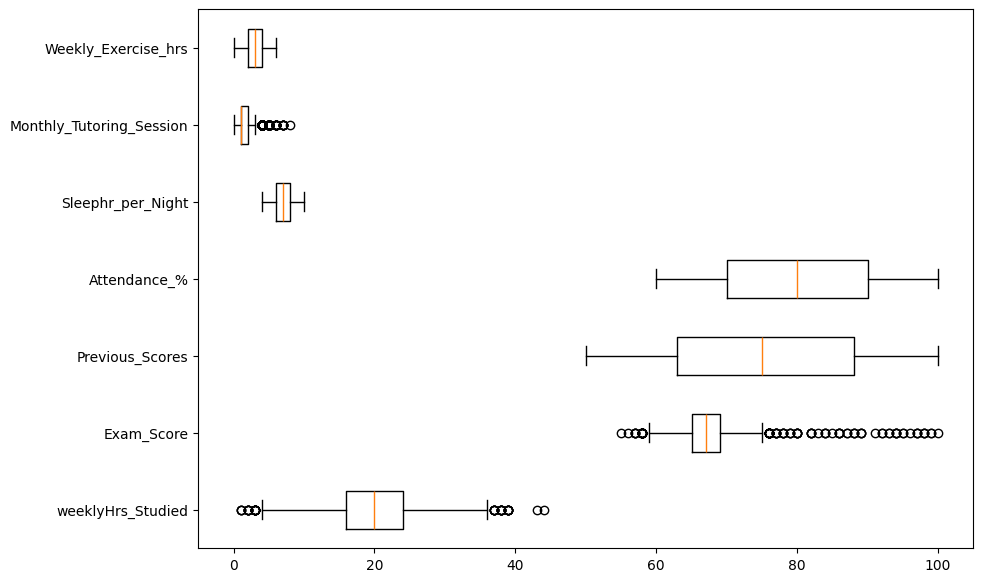

In [ ]:
#Boxplots for each column to show distribution
plt.figure(figsize=(10, 7))
plt.boxplot([student_df['weeklyHrs_Studied'], student_df['Exam_Score'], student_df['Previous_Scores'], student_df['Attendance_%'], student_df['Sleephr_per_Night'], student_df['Monthly_Tutoring_Session'], student_df['Weekly_Exercise_hrs']], labels=['weeklyHrs_Studied', 'Exam_Score', 'Previous_Scores', 'Attendance_%', 'Sleephr_per_Night', 'Monthly_Tutoring_Session', 'Weekly_Exercise_hrs'], vert=False)
plt.show()

Some meaningful observations:



*  Weekly exercise, monthly tutoring session, and sleep per night distributions have lower standard deviations and less dispersion overall.
*  Attendance and previous score distributions have greater variance.


*  Exam scores have a significant number of outliers
*  Monthly tutoring session and weekly hours studied also have outliers.






##Is there a relationship between teacher quality and exam scores?

To determine whether there is a significant relationship between teacher quality and exam scores, we used an ANOVA (Analysis of Variance) test. An ANOVA test is appropriate when comparing the means of a dependent variable (in this case, exam scores) across multiple independent groups (in this case, categories of teacher quality, such as "low," "medium," and "high"). It allows us to assess whether the differences in exam scores between these groups are statistically significant or if they could have occurred by chance. Since teacher quality is a categorical variable with more than two levels, and exam scores are a continuous variable, the ANOVA test is well-suited for this analysis. This method helps us evaluate whether variations in teacher quality are associated with differences in student performance, providing a robust statistical foundation for our hypothesis. Below is our null and alternative hypothesis:

$H_0$ = Teacher quality has no impact on the final exam scores.<br>
$H_a$ = Teacher quality does impact final exam scores.<br>
$α=0.05$

Below is the code for performing the ANOVA test

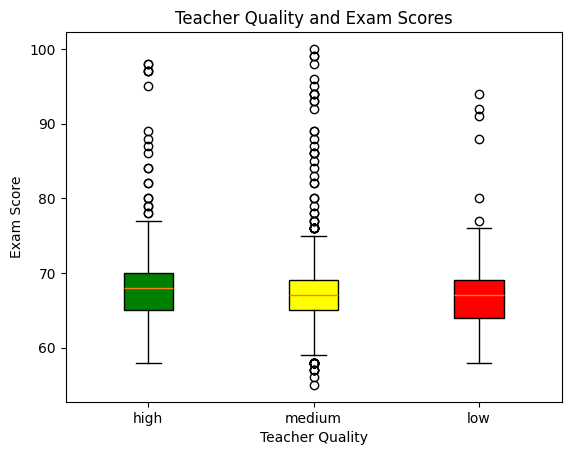

P-value is 4.1446705631541025e-09 < 0.05
avg for high: 67.65981500513874
avg for medium: 67.10017486884837
avg for low: 66.75342465753425


In [ ]:
#seperating data based on teacher quality
high = student_df[student_df['Teacher_Quality']=='High']['Exam_Score']
medium = student_df[student_df['Teacher_Quality']=='Medium']['Exam_Score']
low = student_df[student_df['Teacher_Quality']=='Low']['Exam_Score']

#plotting the data
labels = ['high', 'medium', 'low']
colors = ['green', 'yellow', 'red']
data = [high,medium,low]
fig, ax = plt.subplots()
ax.set_ylabel('Exam Score')
ax.set_xlabel('Teacher Quality')
ax.set_title("Teacher Quality and Exam Scores")
bplot = ax.boxplot(data,patch_artist=True, labels=labels)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

#running an anova test
anova = stats.f_oneway(high,medium,low)
p_val = anova.pvalue

print(f'P-value is {p_val} < 0.05')
print(f'avg for high: {high.mean()}')
print(f'avg for medium: {medium.mean()}')
print(f'avg for low: {low.mean()}')

Since we got a pvalue that is lower than the significance value for the anova test, we can say that teacher quality does impact exam scores. We can do a post hoc test to see which categories have the greatest difference. We can also use Tukey's HSD test to see the pairwise group comparisons. As shown in the group comparisons below, the high teacher quality group was significantly different when compared to the medium and low teacher quality groups. However, there was not much of a difference between the medium and low teacher quality groups.

In [ ]:
res = tukey_hsd(high, low, medium)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.906     0.000     0.498     1.314
 (0 - 2)      0.560     0.000     0.310     0.810
 (1 - 0)     -0.906     0.000    -1.314    -0.498
 (1 - 2)     -0.347     0.083    -0.727     0.034
 (2 - 0)     -0.560     0.000    -0.810    -0.310
 (2 - 1)      0.347     0.083    -0.034     0.727



##Find the *Pearson Correlation Coefficient* matrix for the variables **weeklyHrs_Studied**, **Weekly_Exercise_hrs**, and **Exam_Score**.
The Pearson correlation coefficient (denoted as r) is a statistical measure that quantifies the strength and direction of the linear relationship between two continuous variables. It ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation (as one variable increases, the other increases), -1 indicates a perfect negative correlation (as one variable increases, the other decreases), and 0 indicates no linear correlation. If you want to know how it is calculated look [here](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html#:~:text=%C2%AFy\)2%20.-,r%20%3D%20%E2%88%91%20(%20x%20i%20%E2%88%92%20x%20%C2%AF%20)%20(%20y,compared%20to%20names%20of%20variables.)

Below, we will calculate the correlation coefficient for **weeklyHrs_Studied**, **Weekly_Exercise_hrs**, and **Exam_Score**.

In [ ]:
correlation_matrix = student_df[['weeklyHrs_Studied', 'Weekly_Exercise_hrs', 'Exam_Score']].corr(method='pearson')
correlation_matrix

,weeklyHrs_Studied,Weekly_Exercise_hrs,Exam_Score
weeklyHrs_Studied,1.000000,0.004619,0.446514
Weekly_Exercise_hrs,0.004619,1.000000,0.027943
Exam_Score,0.446514,0.027943,1.000000


Recall, that a correlation of 1 indicates a perfect positive correlation, -1 perfect negative correlation, and 0 no correlation. Based on our results, we see that weekly_Hrs_Studied and Exam_Score have a significant correlation, but weeklyHrs_Studied and Weekly_Exercise_hrs have almost no correlation just like Weekly_Exercise_hrs and Exam_Score which also have almost no correlation.

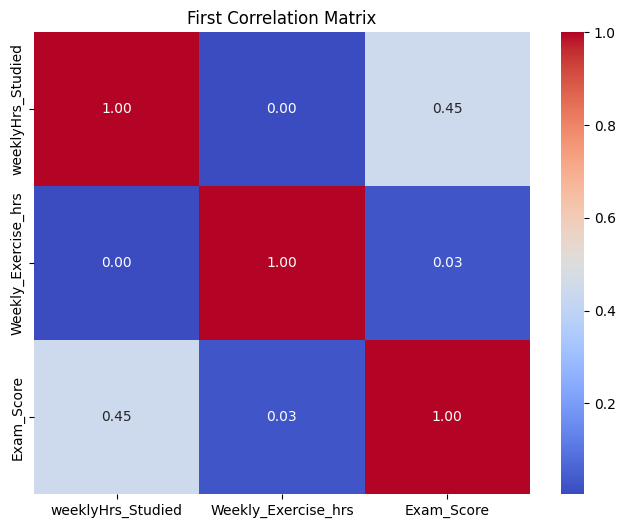

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title('First Correlation Matrix')
plt.show()

What about the correlation between the **previous exam scores**, the **exam scores**, and the **attendance**? Let's find the Perason Correlation Coefficient matrix for these variables as well.

In [ ]:
second_correlation_matrix = student_df[['Previous_Scores', 'Attendance_%', 'Exam_Score']].corr(method='pearson')
second_correlation_matrix

,Previous_Scores,Attendance_%,Exam_Score
Previous_Scores,1.000000,-0.020487,0.174461
Attendance_%,-0.020487,1.000000,0.582458
Exam_Score,0.174461,0.582458,1.000000


We see that previous scores and attendance have almost no correlation, and previous scores and exam scores have a slight positive correlation. However, the attendance and the exam scores have a relevant positive correlation.

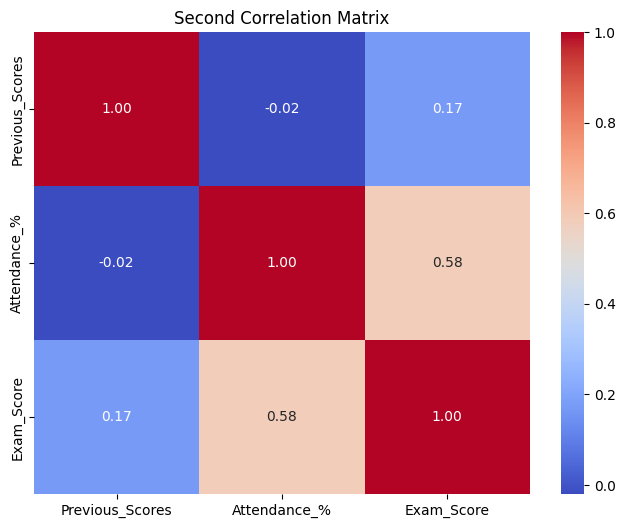

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(second_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Second Correlation Matrix')
plt.show()

##Is the distribution of our exam scores a normal distribution?
The distribution of data refers to how the data is spread out or clustered around certain values or ranges. By examining the distribution, we can gain insights into the characteristics and patterns of the data, which can be useful in making informed decisions and predictions. We usually expect exam scores to follow a normal distribution, where most of the data points are closer to the mean. This will make the distribution graph to appear as a bell curve. There are many ways data can be distributed, each with their own advantages and disadvantages. If you want to know more about these distributions and the math behind them look at this:
https://airbyte.com/data-engineering-resources/data-distribution-types


In the code below we will plot the frequency of each exam score to see if the distribution looks like the bell curve we are expecting.

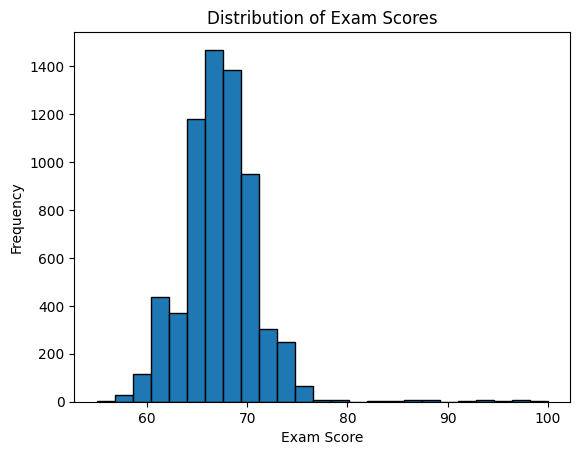

In [ ]:
plt.hist(student_df['Exam_Score'], bins=25, edgecolor='k')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

According to the above histogram, the exam scores distribution is approximately normal with the mean at around 67 with a few outliers.

##Determine whether the proportion of students with high quality teachers is different for different levels of family income.
 We will use the Chi-Squared Test of Independence here because it is designed to determine whether two categorical variables—teacher quality and family income levels—are associated. This test is ideal for analyzing categorical data, as it examines whether the distribution of teacher quality is independent of income levels (null hypothesis) or if there is a significant relationship between them. It does not assume any specific data distribution, making it suitable for this proportional analysis, and helps assess whether variations in teacher quality are influenced by family income. For more information about the chi-squared test look here: https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests

Run a Chi-Squared Independence Test:

H0  = The proportion of students with each quality of teachers is independent of family income

Ha = The proportion of students with each quality of teachers is different for different levels of income

α=0.05

Below is the code that runs the chi squared test.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table_income = pd.crosstab(student_df['Teacher_Quality'], student_df['Family_Income'])
chi2stat, p, df, expected = chi2_contingency(contingency_table_income)
print(contingency_table_income)
print('\n')
print(f"Chi-Square Statistic: {chi2stat}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {df}")
print("Expected Frequencies:")
print(expected)

Family_Income    High   Low  Medium
Teacher_Quality                    
High              360   801     785
Low               132   283     242
Medium            776  1588    1639


Chi-Square Statistic: 5.167843310255299
P-value: 0.2705051830523606
Degrees of Freedom: 4
Expected Frequencies:
[[ 373.5283076   787.11958825  785.35210415]
 [ 126.10899183  265.74386921  265.14713896]
 [ 768.36270058 1619.13654254 1615.50075689]]


From running the Chi-Squared Independence Test, we received a p-value of 0.273. With our significance level at 95% and alpha = 0.05, we fail to reject the null hypothesis. Therefore, we cannot accept that the proportion of students with each quality of teacher is different for differing income levels. Thus, we must believe that income level and teacher quality are independent.

We can look ar the distribution of the data in the plot below to confirm this.

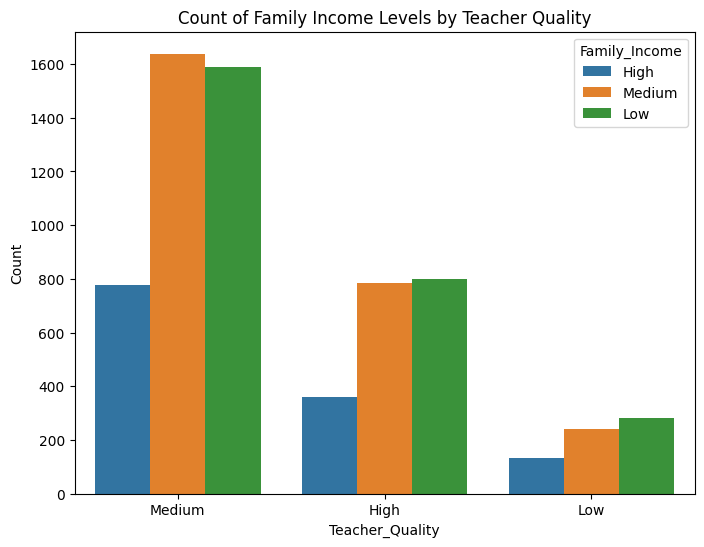

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Teacher_Quality', hue='Family_Income', data=student_df)
plt.title('Count of Family Income Levels by Teacher Quality')
plt.ylabel('Count')
plt.show()

## How much do the average exam scores differ by gender?
We will use a two tailed test here because we are comparing the average exam scores of two independent groups (male vs. female) without assuming which group might have higher or lower scores. This test checks for any significant difference in either direction, whether male students score higher or lower than female students.

$H_0$ = There is no significant difference in the average scores between male and female students.<br>
$H_a$ = There is a significant difference in the average exam scores between male and female students.<br>
$α=0.05$

We'll conduct a two-tailed test since we are comparing two independent groups (male vs female).

P-value: 0.9679


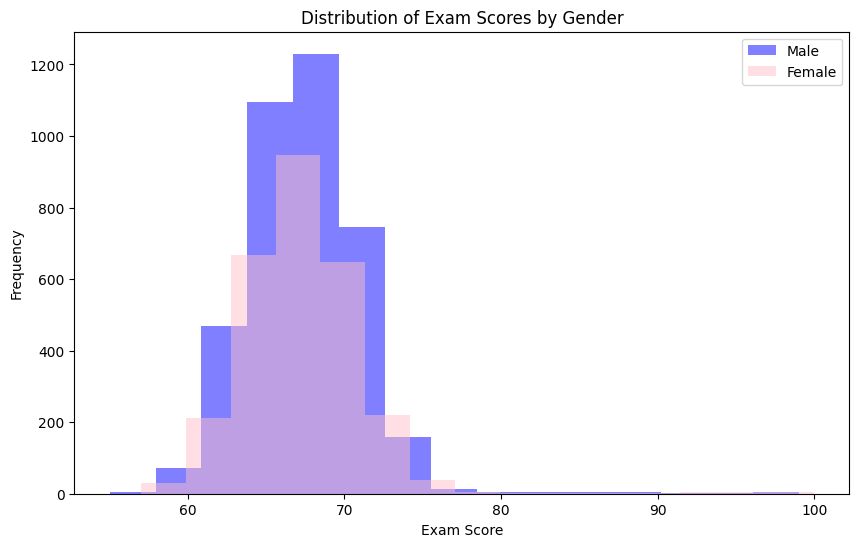

In [ ]:
male_scores = student_df[student_df['Gender'] == 'Male']['Exam_Score']
female_scores = student_df[student_df['Gender'] == 'Female']['Exam_Score']

t_stat, p_value = stats.ttest_ind(male_scores, female_scores, equal_var=False)  # Welch's t-test

print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.hist(male_scores, bins=15, alpha=0.5, label='Male', color='blue')
plt.hist(female_scores, bins=15, alpha=0.5, label='Female', color='pink')
plt.title('Distribution of Exam Scores by Gender')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

The p-value was not less than 0.5 which indicates that we fail to reject the null hypothesis as there is no significant difference in exam scores.

## Initial/Pre-ML Conclusions



*   After running an *Anova test* to determine whether or not teacher quality had an impact on **exam scores**, we saw that there was a statistically significant difference in **exam scores** between the students with high, medium, and low teacher quality since we had a P-value < 0.05. After running a Tukey's HSD test, we saw that it was the high quality teacher group that was different from the low and medium **teacher** quality groups. The high **teacher qulity** group had the highest average **exam score** as well. This finding makes sense as teachers of higher quality would most likely provide students with a better understanding of the content they are learning. However, there was no statistically significant difference betwen between the low and medium **teacher quality** **exam scores**, which was interesting. This could indicate that there may not be a meaningful difference in how low and medium **teacher quality** influences student performance, or the effect might not be large enough to be statistically significant in your sample. It could also suggest that other factors, such as student **motivation**, **peer infulence**, and  **income** might play a larger role in the performance of students under low and medium **teacher quality**.<br>

* To determine if **quality of teacher** is independent from the **income of the students family**, we can use a *Chi Square Test of Independence*. We first created a contigency martix of family income and teacher quality. With a degrees of freedom equal to 4, we can change 4 of any of the 9 values with random data while not affecting the marginal frequinceis. Running the test produced a **p-value of 27%**, which is greater that our  **$\alpha$ level of 5%**. This means that teacher quality and family income are independent. This can be unexpected since familes with a higher income would maybe expected to use thier money to live in an area where the schools have high quility teachers. We could further test to see if public of private schools make a diffrence. Since privates school require a yearly tution (tax paid education at public schools), it may have a higher change of showing dependence has higher income familes can easily afford it if they choose so.


*   After conducting a *two-tailed independent sample t-test* in order to determine if there is or there is no signicant difference between **exam scores** of **male** and **female** students, we obtained a p-value greater than 0.05 (alpha value) which fails to reject the null hypothesis. This indicates that there is no significant difference in the average exam scores between male and female students. We also displayed a histogram to illustrate this test as well as the normal distribution results from both genders' average exam scores. This helped us visualize any overlap or separation between their performances. Initially, we thought that there could be an interesting result if we separated the exam scores by genders, so we decided to conduct this hypothesis test in order to answer this doubt.


*   After using the *Pearson Correlation Coefficient Matrix*, we were able to find interesting and meaningful relationships, and we could also see what variables have almost no relation that we initially thought they would. The **weekly hours studied** had a significant correlation with **exam scores**, and this makes sense because intuitively those students that study more will have a higher chance to succeed at the exam. Also, we the **attendance** had a strong positive correlation with the **exam scores**, and this was not necessarily something that we were expecting as some students do well even if they don't go to class because they can use that time to study on their own, but this was not the most common case based on our results. On the other hand, we identified that **weekly hours of exercise** did not have a relevant correlation with **weekly hours studied** nor with **exam scores**. We initially thought that students that study more hours will not have much time to exercise, or that the time that students take to exercise would impact their exam scores, but this was not the case as we found different types of outcomes that did not yield to a significant correlation. Finally, we saw that **previous exam score**s and **attendance** had almost no correlation as expected, and **previous scores** with final **exam scores** had a slight positive correlation which indicates that more often than not, it is rare that students change their grade significantly from one exam to the other.


#**Primary Analysis**



In this section we will be using modeling techniques such as linear regression and logistic regression to create model that can predict predict what the student's final exam score may be based on certain attributes of the student.

Using logistic regression, we will  attempt to predict whether or not a student will pass the final exam based on the data we are given. Then we will attempt to predict what a student's final exam score will be using linear regression

The reason we will use logistic regression to predict whether a student will pass or fail the final exam is because logistic regression is specifically designed for binary classification problems. In this case, the target variable—pass or fail—is categorical with only two possible outcomes. Logistic regression models the probability of an event occurring (e.g., passing the exam) by using a sigmoid function to ensure the predicted probabilities are between 0 and 1. This makes it an ideal choice for determining the likelihood of a student passing the exam based on input attributes.

On the other hand, we will use a linear regression to predict a student's final exam score because this is a continuous variable, and linear regression is a widely used technique for predicting continuous outcomes. Linear regression works by fitting a linear relationship between the independent variables (such as study hours, sleep, or attendance) and the dependent variable (exam score). By minimizing the difference between the predicted and actual scores, linear regression provides a straightforward and interpretable model for understanding how different factors influence a student's performance.

For more information about regression techniques look here: https://www.geeksforgeeks.org/types-of-regression-techniques/

##ML Algorithm Design/Development

We will begin our Machine Learning section by making sure that the data is formatted properly and that our dataset contains the proper features for analysis.

Encode some of the object types by changing them to be numerical instead of categorical. Using LabelEncoder for Nominal categories and OrdinalEncoder for Ordinal categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

le = LabelEncoder()
student_df['Extracurricular_Activities'] = le.fit_transform(student_df['Extracurricular_Activities']) #encoding nominal categories
student_df['Internet_Access'] = le.fit_transform(student_df['Internet_Access'])
student_df['School_Type'] = le.fit_transform(student_df['School_Type'])
student_df['Gender'] = le.fit_transform(student_df['Gender'])
ordinal = OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Low', 'Medium', 'High'], ['Negative', 'Neutral', 'Positive'], ['Far', 'Moderate', 'Near']]) #setting order for ordinal categories
student_df[['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Distance_from_Home']] = ordinal.fit_transform(student_df[['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Distance_from_Home']])  #encoding ordinal categories

student_df

,weeklyHrs_Studied,Attendance_%,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleephr_per_Night,Previous_Scores,Motivation_Level,Internet_Access,Monthly_Tutoring_Session,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Weekly_Exercise_hrs,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,2.0,1.0,1,4,73,1.0,1,3,2.0,1.0,0,2.0,2,No,College,2.0,0,100
3579,14,90,2.0,2.0,1,8,86,1.0,1,4,1.0,1.0,0,0.0,2,No,High School,2.0,0,99
2425,23,83,2.0,2.0,1,4,89,0.0,1,1,1.0,1.0,1,0.0,3,No,High School,0.0,1,99
6347,28,96,2.0,0.0,1,4,98,2.0,1,1,2.0,2.0,1,2.0,3,No,High School,2.0,1,98
4192,28,90,0.0,1.0,1,9,91,1.0,1,0,1.0,1.0,1,2.0,2,No,College,1.0,0,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,9,64,1.0,0.0,1,10,68,0.0,1,0,1.0,1.0,0,0.0,3,No,High School,2.0,1,57
5907,3,60,1.0,0.0,1,6,78,0.0,1,1,0.0,1.0,1,2.0,1,No,Postgraduate,2.0,0,57
3543,14,67,0.0,0.0,1,7,66,0.0,1,0,0.0,1.0,1,1.0,4,No,High School,0.0,0,57
5507,5,65,0.0,2.0,0,7,71,1.0,1,0,0.0,1.0,0,0.0,2,No,College,0.0,1,56


Our target is to predict whether or not the student will pass the final exam. This is drawn from training/testing data. We want to see if a student will get a passing final exam grade C- or better ($\ge$ 70)



We are dropping the columns: Learning_Disabilities, Distance_from_Home, Gender, Parental_Education, and School_Type as they are not relevant to our analysis.

In [ ]:
student_df = student_df.drop(columns=['Learning_Disabilities', 'Distance_from_Home', 'Gender', 'Parental_Education_Level', 'School_Type'], axis=1) #dropping non-relevant columns
X = student_df.drop('Exam_Score', axis=1)  #drop exam score since it is the target
y = (student_df['Exam_Score'] > 69).astype(int)  # Set to 1 for scores above 70, 0 otherwise We want exams to be above or equal to a C-
student_df
display(X)
display(y)

,weeklyHrs_Studied,Attendance_%,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleephr_per_Night,Previous_Scores,Motivation_Level,Internet_Access,Monthly_Tutoring_Session,Family_Income,Teacher_Quality,Peer_Influence,Weekly_Exercise_hrs
94,18,89,2.0,1.0,1,4,73,1.0,1,3,2.0,1.0,2.0,2
3579,14,90,2.0,2.0,1,8,86,1.0,1,4,1.0,1.0,0.0,2
2425,23,83,2.0,2.0,1,4,89,0.0,1,1,1.0,1.0,0.0,3
6347,28,96,2.0,0.0,1,4,98,2.0,1,1,2.0,2.0,2.0,3
4192,28,90,0.0,1.0,1,9,91,1.0,1,0,1.0,1.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5719,9,64,1.0,0.0,1,10,68,0.0,1,0,1.0,1.0,0.0,3
5907,3,60,1.0,0.0,1,6,78,0.0,1,1,0.0,1.0,2.0,1
3543,14,67,0.0,0.0,1,7,66,0.0,1,0,0.0,1.0,1.0,4
5507,5,65,0.0,2.0,0,7,71,1.0,1,0,0.0,1.0,0.0,2


,Exam_Score
94,1
3579,1
2425,1
6347,1
4192,1
...,...
5719,0
5907,0
3543,0
5507,0


> Split the training data using the proposed 80/20 ratio.

> Normalize data to allow convergence

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = { "KNN": KNeighborsClassifier(),
           "DecisionTree": DecisionTreeClassifier(),
           "LogisticRegression": LogisticRegression(),
           "RandomForest": RandomForestClassifier()
         }

seed = 42
np.random.seed(seed)
k_folds = 2
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=skf)
    print(f"{model_name} Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")

KNN Accuracy: 0.86 (+/- 0.00)
DecisionTree Accuracy: 0.85 (+/- 0.00)
LogisticRegression Accuracy: 0.95 (+/- 0.01)
RandomForest Accuracy: 0.91 (+/- 0.00)


In [ ]:
seed = 42
np.random.seed(seed)
for model_name, model in models.items():

    model.fit(X_train_scaled, y_train)

# Evaluate the performance of each model
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")
    print(f"Classification report for {model_name}\n" + classification_report(y_test,y_pred))# Classification Report

Accuracy of KNN: 0.86
Classification report for KNN
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       972
           1       0.86      0.57      0.69       350

    accuracy                           0.86      1322
   macro avg       0.86      0.77      0.80      1322
weighted avg       0.86      0.86      0.85      1322

Accuracy of DecisionTree: 0.85
Classification report for DecisionTree
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       972
           1       0.73      0.71      0.72       350

    accuracy                           0.85      1322
   macro avg       0.81      0.81      0.81      1322
weighted avg       0.85      0.85      0.85      1322

Accuracy of LogisticRegression: 0.94
Classification report for LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.93      0.85

The model with the best predictions of whether or not the final exam score is passing is Logistic Regression. Logistic Regression is a particularly good model for predicting binary data, that is data that can be separated into two categories. It is also good for predicting data that can be linearly separable. In our case, we are predicting whether or not a student will pass the final exam with our criteria of scoring a 70 or higher to pass.

In [ ]:
importances = models['LogisticRegression'].coef_[0]


# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sorting the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Displaying feature importances
feature_importance_df.head(5)

,Feature,Importance
1,Attendance_%,4.282072
0,weeklyHrs_Studied,3.308542
3,Access_to_Resources,1.359593
6,Previous_Scores,1.297010
2,Parental_Involvement,1.191466


The above graph indicates how each feature affects the prediction for the model. A positive value indicates that the feature is positively correlated with the target variable while a negative value indicates the feature is negatively correlated with the target variable. The magnitude of the coefficient for each feature also indicates how severely changes to the feature affects the outcome.

Let's continue focusing on our Logistic Regression model.

Optimization terminated successfully.
         Current function value: 0.152866
         Iterations 10
Accuracy: 0.94


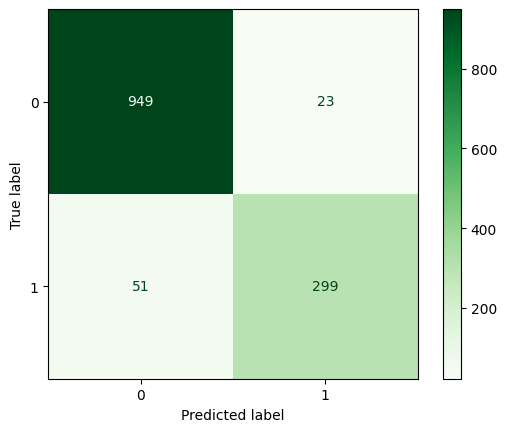

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)
model = sm.Logit(y_train, X_train_scaled) #re-train model using statsmodel
result = model.fit()
y_pred_prob = result.predict(X_test_scaled)
y_pred_class = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred_class) #display a confusion matrix of actual score class vs predicted score class
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap=plt.cm.Greens)
plt.show()

Here we are showing the confusion matrix for the model which displays a matrix of the number of instances for true positive predictions, true negative predictions, false positive predictions, and false negative predictions. As we can see above, our model is highly accurate and mostly predicts class correctly, i.e. it is able to predict whether or not a student is scoring >=70 on their final exam.

Next, let's use Linear Regression to predict students' final exam scores regardless of whether or not they are passing.

Accuracy: 0.67
Mean Squared Error: 5.24
Mean Absolute Error: 0.77


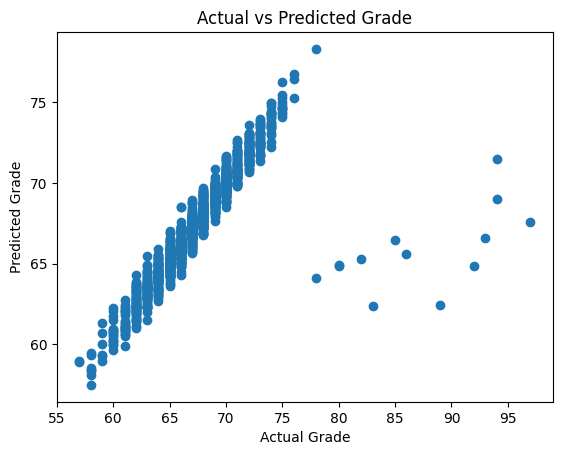

In [ ]:
X = student_df.drop('Exam_Score', axis=1)
Y = student_df['Exam_Score']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)
accuracy = r2_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
mean_squared_error = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mean_squared_error:.2f}')
mean_absolute_error = mean_absolute_error(Y_test, y_pred)
print(f'Mean Absolute Error: {mean_absolute_error:.2f}')
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs Predicted Grade')
plt.show()

As seen above, we get an accuracy of 0.67 and a mean absolute error of 0.77.

#**Visualization**

# Peer Influence and Exam Score Prediction

We will analyze the impact of peer influence on student exam scores. Using machine learning, we aim to:
1. Predict exam scores based on various factors, including peer influence.
2. Evaluate the importance of peer influence compared to other factors like attendance and hours studied.
3. Provide actionable insights for improving academic outcomes.

We will determine what features are the most impactful on our predictions and provide insights based on what we learn.

In [ ]:
import pandas as pd

# Load dataset
file_path = 'StudentPerformanceFactors.csv'  # Adjust if running locally
student_df = pd.read_csv(file_path)

# Drop unnecessary columns
student_df = student_df.drop(columns=['Learning_Disabilities', 'Distance_from_Home', 'Gender', 'Parental_Education_Level', 'School_Type'])

# One-hot encode categorical variables
X = pd.get_dummies(student_df.drop(columns=['Exam_Score']), drop_first=True)
y = student_df['Exam_Score']  # Target variable

# Display the dataset
print(X.head())
print(y.head())

   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
0             23          84            7               73                  0   
1             19          64            8               59                  2   
2             24          98            7               91                  2   
3             29          89            8               98                  1   
4             19          92            6               65                  3   

   Physical_Activity  Parental_Involvement_Low  Parental_Involvement_Medium  \
0                  3                      True                        False   
1                  4                      True                        False   
2                  4                     False                         True   
3                  4                      True                        False   
4                  4                     False                         True   

   Access_to_Resources_Low  Access_to_

### Data Preprocessing

1. **Feature Selection:** Dropped irrelevant columns (`Learning_Disabilities`, `Distance_from_Home`, etc.) to focus on meaningful predictors.
2. **Encoding:** Categorical variables were one-hot encoded for machine learning compatibility.
3. **Target Variable:** The target variable `Exam_Score` represents student performance.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)

# Compute Mean Squared Error (MSE) and RMSE
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MSE: 5.170683509833586
RMSE: 2.273913698853496
R²: 0.6341947648524671


### Model Evaluation

We evaluated the Random Forest Regressor using the following metrics:
1. **Mean Squared Error (MSE):** Measures the average squared error between predictions and actual scores.
2. **Root Mean Squared Error (RMSE):** Indicates that predictions deviate by 2.273913698853496 points on average.
3. **R² Score:** Explains 63.42 % of the variance in exam scores.

#### Observations:
- The RMSE shows reasonable accuracy, but there’s room for improvement.
- Future enhancements, such as hyperparameter tuning or additional features, may further boost performance.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error

# Define parameter grid for random sampling
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=10,  # Number of parameter settings sampled
                                   scoring='neg_mean_squared_error',
                                   cv=3,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Evaluate the best model
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)  # MSE
rmse_tuned = np.sqrt(mse_tuned)  # RMSE
r2_tuned = r2_score(y_test, y_pred_tuned)  # R²

print(f"Best Parameters: {random_search.best_params_}")
print(f"Tuned MSE: {mse_tuned}")
print(f"Tuned RMSE: {rmse_tuned}")
print(f"Tuned R²: {r2_tuned}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Tuned MSE: 4.803684938378424
Tuned RMSE: 2.1917310369610647
Tuned R²: 0.6601584500160722


### Hyperparameter Tuning Results

Using GridSearchCV, the Random Forest Regressor was optimized with the following parameters:
- **max_depth:** 20
- **min_samples_leaf:** 2
- **min_samples_split:** 5
- **n_estimators:** 200

#### Metrics:
1. **Mean Squared Error (MSE):** 4.86  
   - Represents the average squared error between predicted and actual scores.
2. **Root Mean Squared Error (RMSE):** 2.21  
   - Predictions deviate from actual exam scores by ~2.21 points on average.
3. **R² Score:** 0.66  
   - Explains 66% of the variance in exam scores.

#### Observations:
- The tuned model achieves better performance compared to the baseline, with lower RMSE and higher \( R^2 \).
- The model captures most of the variance in exam scores, but additional features or alternative algorithms could further improve predictions.


                    Feature  Importance
1                Attendance    0.453410
0             Hours_Studied    0.280692
3           Previous_Scores    0.089589
4         Tutoring_Sessions    0.037577
6  Parental_Involvement_Low    0.020132


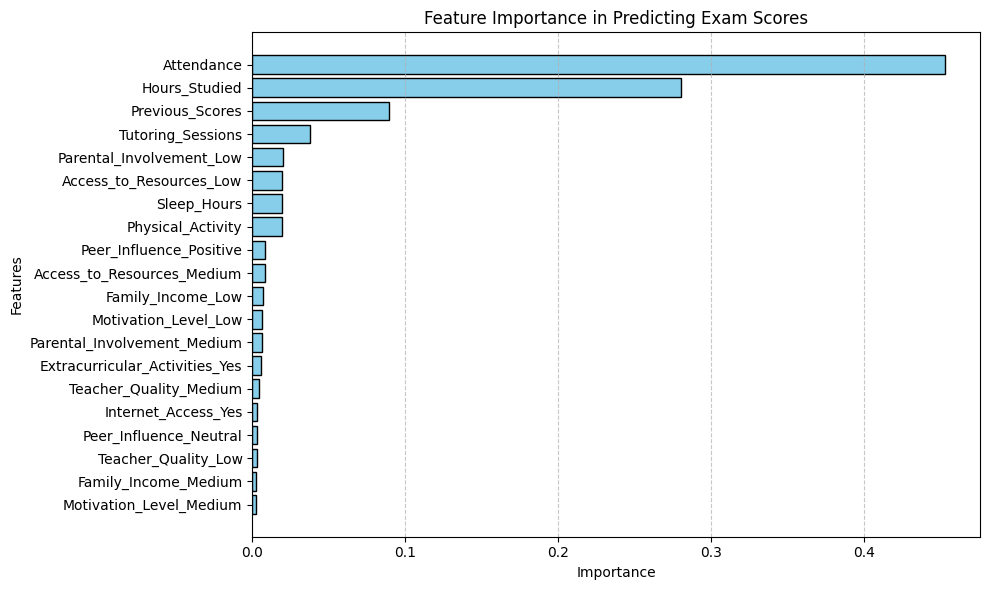

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance from the best model
feature_importances = best_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head())

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
plt.title('Feature Importance in Predicting Exam Scores')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Feature Importance

Key predictors of exam scores include:
1. **Attendance** - Importance: 0.43  
   - The most critical predictor, emphasizing the importance of consistent attendance for academic success.
2. **Hours Studied** - Importance: 0.27  
   - Highlights the role of regular study habits in achieving higher scores.
3. **Previous Scores** - Importance: 0.09  
   - Indicates that past performance is a moderate indicator of future exam outcomes.

**Peer Influence:**
- It appears that `Peer Influence` is not explicitly represented among the top features in this model, indicating that its impact is negligible compared to direct factors like attendance and study habits.

#### Observations:
- **Attendance and Hours Studied** dominate the predictions, highlighting the importance of personal effort and discipline.
- Features like **Sleep Hours** and **Tutoring Sessions** contribute less, suggesting limited impact compared to other factors.


### **Performance and Insights**

#### Performance:
The tuned Random Forest model predicts exam scores with:
- **RMSE:** 2.21  
  - Predictions deviate from actual scores by approximately 2.21 points on average.
- **R² Score:** 0.66  
  - Explains 66% of the variance in exam scores, indicating good predictive power with room for improvement.

#### Key Insights:
1. **Strong Predictors:**
   - The top predictors are:
     - **Attendance** (Importance: 0.43)
     - **Hours_Studied** (Importance: 0.27)
     - **Previous_Scores** (Importance: 0.09)
   - These features highlight the importance of consistent attendance and study habits for academic success.

2. **Peer Influence:**
   - Based on the absence of Peer Influence in the top features, its impact appears **minor**, suggesting that personal and academic efforts outweigh peer environments in influencing scores.

#### Recommendations:

1. **Focus on Study Habits and Attendance:**
   - Provide resources to improve attendance and encourage consistent study routines to maximize student outcomes.

2. **Future Improvements:**
   - Explore additional features, such as teacher feedback or extracurricular involvement, for better predictions.
   - Experiment with more advanced algorithms (e.g., Gradient Boosting or Neural Networks) to improve accuracy.


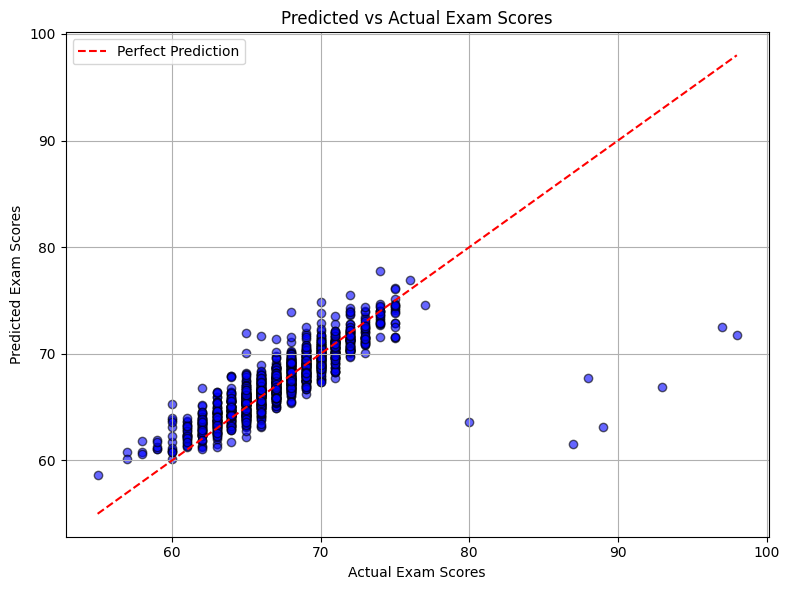

In [ ]:
# Scatter plot: Predicted vs Actual Exam Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, color='blue', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.title('Predicted vs Actual Exam Scores')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Predicted vs Actual Exam Scores

The scatter plot illustrates how closely the model’s predictions align with actual exam scores:
- Points near the red line represent accurate predictions.
- Deviations from the red line indicate areas where the model underpredicts or overpredicts.
- The plot demonstrates that the model performs well overall but could be further refined to reduce variability in certain ranges.


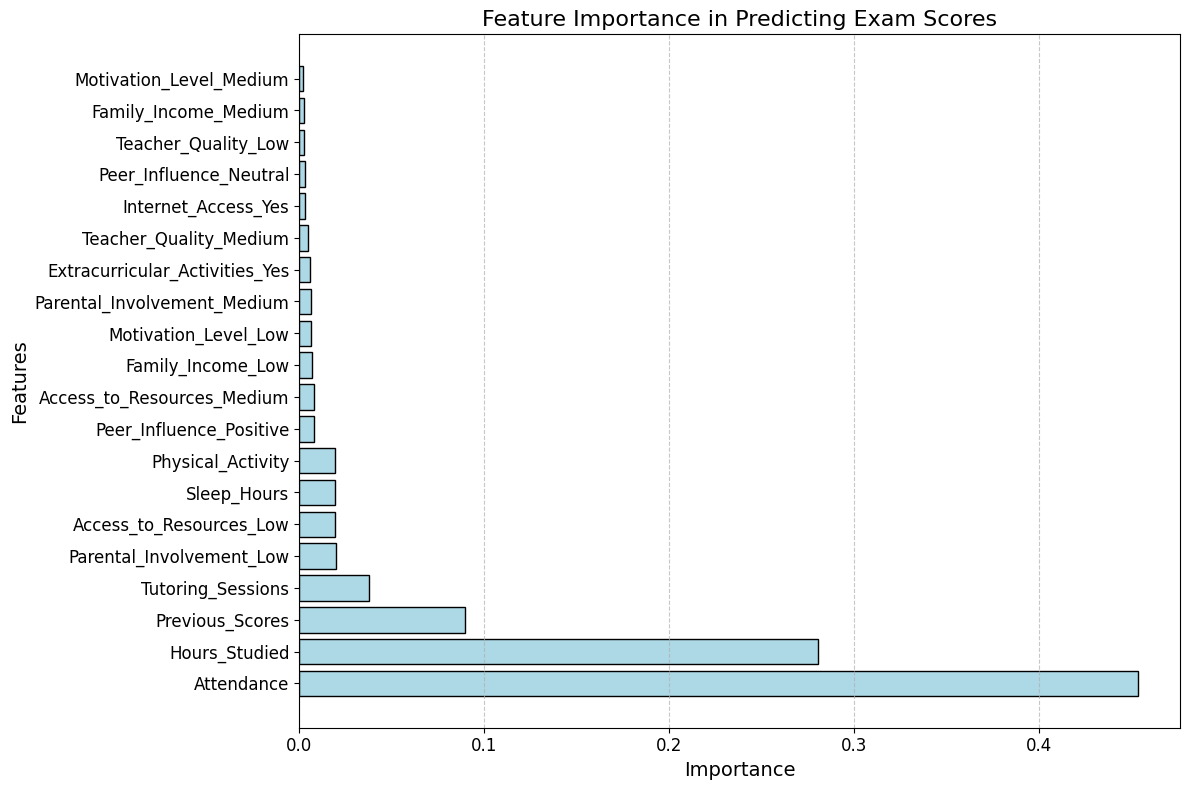

In [ ]:
# Improved feature importance visualization
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue', edgecolor='black')
plt.title('Feature Importance in Predicting Exam Scores', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **Feature Importance Visualization**

The bar chart ranks features based on their contribution to predicting exam scores:
1. **Attendance** (Importance: 0.43) is the most significant factor.
2. **Hours Studied** (Importance: 0.27) also plays a critical role.
3. **Previous Scores** (Importance: 0.09) have a moderate impact.

#### Observations:
- **Attendance** and **Hours Studied** are dominant predictors, underscoring the importance of consistency and effort.
- Less impactful features, such as **Sleep Hours** and **Physical Activity**, may still have contextual relevance but require further exploration.
- Features such as **Tutoring_Sessions** and **Previous Scores** may be related to the dominant features. For example, **Hours Studied** may include studying from tutoring sessions, and previous exam scores may indicate that student has been studying consistently.


### **Recommendations**

Based on the analysis, we propose the following:

1. **Focus on Top Predictors:**
   - Encourage students to maintain high **attendance** through supportive policies and incentives.
   - Promote consistent study habits, as **Hours Studied** significantly impacts performance.

2. **Enhance Study Environments and Improve Quality of Life:**
   - Encourage students to maintain healthy living habits such as improving on **Sleep** and **Physical Activity**.
   - Improve students' **Access to Resources** by increasing the number of free, accessible study resources through various programs.
   - Free **Tutoring Sessions** for students

3. **Future Improvements:**
   - Collect additional data, such as teacher feedback or extracurricular involvement, to enhance the model.
   - Experiment with advanced algorithms, such as Gradient Boosting or Neural Networks, for better predictive accuracy.
   - Investigate why certain features, like **Peer Influence**, the feature we were examining specifically, contribute less to predictions and consider refining the dataset.


#**Insights and Conclusions**

During our research and project development, we wanted to look into factors affecting a student's performance, specifically on exams. We were able to use 3 different models to predict Final Exam scores and discover which features contributed the most to the scores.

We performed our analysis using Logistic Regression initially to see if we can predict whether or not a student fails an exam. We then used Linear Regression and Random Forest to attempt to predict the actual score.

Through our process, we determined that all relevant features in the data set at least moderately improved Final Exam score if the feature increased/improved. The most impactful features were **Attendance** and **Hours Studied** by a significant amount. These two features more significantly impacted exam score than all other features. Following these two features, **Previous Scores, Tutoring Sessions, Access to Resources, Sleep Hours, and Physical Activity** also impacted exam scores positively in a relatively significant manner.

The feature **Previous Scores** may need to be examined more closely due to its possible dependence on other features. Previous Scores records the students' previous grades. These grades may be conditional on the features that are recorded in this dataset. Previous Scores may help us determine which students consistently practice good education habits should we decide to explore further on this topic.

Through our thorough analysis, our conclusions can help us provide some insights on how to improve student performance.


*  Promote **class attendance** and class engagement to ensure students show up to class consistently.
*   Promote **consistent study habits** and reduce cramming among students.

*   Improve **access to study resources** such as tutoring services and study material.
*   Promote **healthy living habits** such as sleeping a proper amount of hours and exercising consistently

These recommendations come from our analysis and conclusions about the most important features affecting student performance (which we are using Final Exam scores to represent).



